# IMPORTING LIBRARIES

In [1]:
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
import numpy as np
import string
import re

# LOADING DATASET

In [2]:
train = pd.read_csv(r'Downloads/train_E6oV3lV.csv')
test = pd.read_csv(r'Downloads/test_tweets_anuFYb8.csv')
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


- The objective of this task is to detect hate speech in tweets.

- For purpose of simplification, we say a tweet contains hate speech if it has a racist or sexist sentiment associated with it. So, the task is to classify racist or sexist tweets from other tweets.

- A training sample of tweets and labels, where label ‘1’ indicates the tweet is racist/sexist and label ‘0’ indicates that tweet is not racist/sexist, your objective is to predict the labels on the given test dataset.

Note: The evaluation metric from this practice problem is F1-Score.

In [3]:
#combining train and test data together

df = train.append(test, ignore_index = True)
df.head()

,id,label,tweet
0,1,0.0,@user when a father is dysfunctional and is s...
1,2,0.0,@user @user thanks for #lyft credit i can't us...
2,3,0.0,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation


In [4]:
#remove twitter handles @
def remove(input_text, pattern):
    r = re.findall(pattern, input_text)
    for i in r:
        input_text = re.sub(i, '', input_text)
        
    return input_text
        

In [5]:
df['clean_tweet'] = np.vectorize(remove)(df['tweet'], "@[\w]*")
df.head()

,id,label,tweet,clean_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


In [6]:
#remove punctuations and special characters
df['clean_tweet'] = df['clean_tweet'].str.replace('[^a-zA-Z#]', " ")

In [7]:
df.head()

,id,label,tweet,clean_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can t use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide society now #motivation


In [8]:
#remove short words like hmm, ohhh etc.

df['clean_tweet'] = df['clean_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

df.head()

,id,label,tweet,clean_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation


In [9]:
#tokenization
tokenized = df['clean_tweet'].apply(lambda x:x.split())
tokenized

0        [when, father, dysfunctional, selfish, drags, ...
1        [thanks, #lyft, credit, cause, they, offer, wh...
2                                  [bihday, your, majesty]
3                         [#model, love, take, with, time]
4                       [factsguide, society, #motivation]
                               ...                        
49154    [thought, factory, left, right, polarisation, ...
49155    [feeling, like, mermaid, #hairflip, #neverread...
49156    [#hillary, #campaigned, today, #ohio, used, wo...
49157    [happy, work, conference, right, mindset, lead...
49158    [song, glad, free, download, #shoegaze, #newmu...
Name: clean_tweet, Length: 49159, dtype: object

In [10]:
#stemming, it used to strip suffixes
from nltk.stem.porter import *

stemmer = PorterStemmer()
tokenized = tokenized.apply(lambda x: [stemmer.stem(i) for i in x])
tokenized

0        [when, father, dysfunct, selfish, drag, kid, i...
1        [thank, #lyft, credit, caus, they, offer, whee...
2                                  [bihday, your, majesti]
3                         [#model, love, take, with, time]
4                             [factsguid, societi, #motiv]
                               ...                        
49154    [thought, factori, left, right, polaris, #trum...
49155    [feel, like, mermaid, #hairflip, #neverreadi, ...
49156    [#hillari, #campaign, today, #ohio, use, word,...
49157    [happi, work, confer, right, mindset, lead, cu...
49158    [song, glad, free, download, #shoegaz, #newmus...
Name: clean_tweet, Length: 49159, dtype: object

In [11]:
#stitch token words back together
for i in range(len(tokenized)):
    tokenized[i] = " ".join(tokenized[i])
    df['clean_tweet'] = tokenized

In [12]:
df.head()

,id,label,tweet,clean_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunct selfish drag kid into dys...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit caus they offer wheelchair ...
2,3,0.0,bihday your majesty,bihday your majesti
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguid societi #motiv


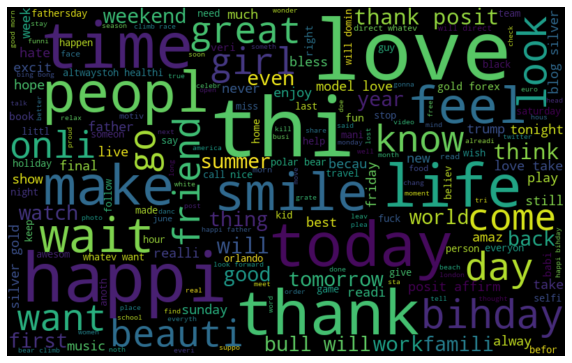

In [13]:
#visualization, word cloud for most repetitive word
words = ' '.join(text for text in df['clean_tweet'])
from wordcloud import WordCloud
wordcloud = WordCloud(width = 800, height = 500, random_state = 42, max_font_size = 120 ).generate(words)

plt.figure(figsize = (10, 9))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

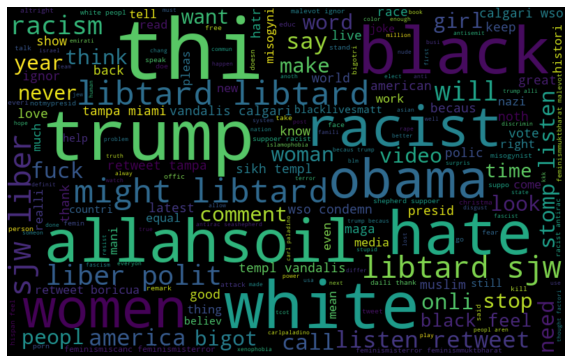

In [14]:
#generating word cloud for sexist/racist
words = " ".join([text for text in df['clean_tweet'][df['label']== 1]])
from wordcloud import WordCloud
wordcloud = WordCloud(width = 800, height = 500, random_state = 42, max_font_size = 120 ).generate(words)

plt.figure(figsize = (10, 10))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

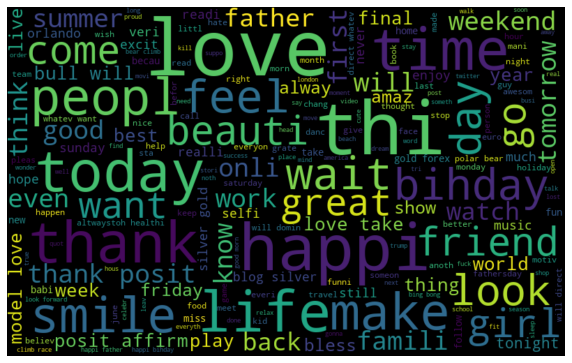

In [15]:
#word cloud for nonsexist and non racist
words = " ".join([text for text in df['clean_tweet'][df['label']== 0]])
wordcloud = WordCloud(width = 800, height = 500, random_state = 42, max_font_size = 112).generate(words)

plt.figure(figsize = (10, 9))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [16]:
#impact of hashtags on twitter
#storing trend terms into two list viz sexist/racist, non sexist/racist.
def hasht(x):
    hashtags = []
    for i in x:
        hashtag = re.findall(r'#(\w+)', i)
        hashtags.append(hashtag)
        
    return hashtags

In [17]:
#extracting hashtags from non sexist / racist

ht_positive = hasht(df['clean_tweet'][df['label'] == 0]) 

#extracting hashtags from sexist/ racist

ht_negative = hasht(df['clean_tweet'][df['label']==1])


#unnesting list

ht_positive = sum(ht_positive, [])
ht_negative = sum(ht_negative, [])

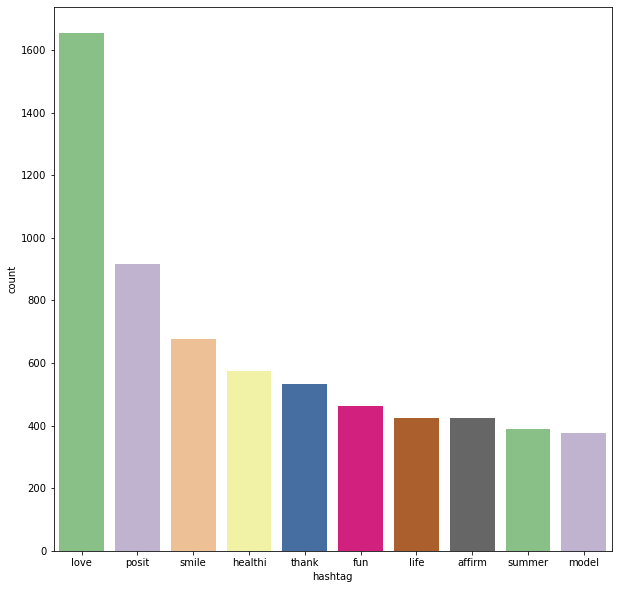

In [18]:
#plotting barplot for non sexist/racist
a = nltk.FreqDist(ht_positive)
df2 = pd.DataFrame({'hashtag': list(a.keys()), 'count': list(a.values())})
#top 10 hashtags with
v = df2.sort_values(by = 'count', ascending = False).head(10)

plt.figure(figsize = (10, 10))
sns.barplot(data = v , x = "hashtag", y = "count", palette = 'Accent')
plt.show()

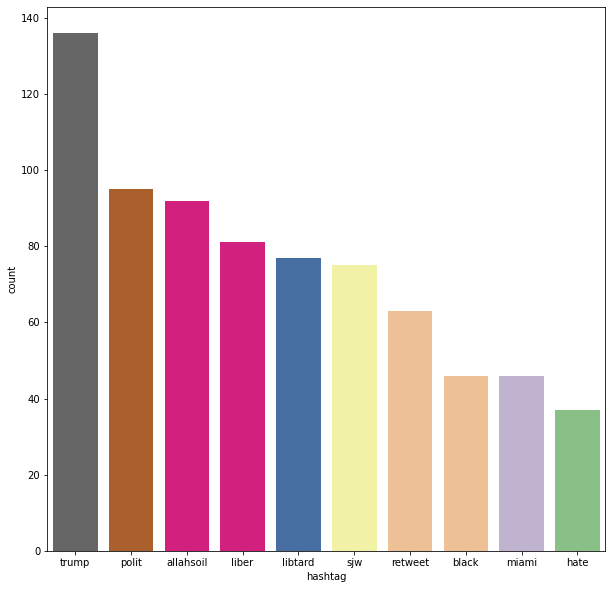

In [19]:
# barplot for sexist/racist
a = nltk.FreqDist(ht_negative)
df2 = pd.DataFrame({'hashtag': list(a.keys()), 'count': list(a.values())})
#top 10 hashtags with
v = df2.sort_values(by = 'count', ascending = False).head(10)

plt.figure(figsize = (10, 10))
sns.barplot(data = v , x = "hashtag", y = "count", palette = 'Accent_r')
plt.show()

In [20]:
#extracting word cleaned tweets
#bag of words
from sklearn.feature_extraction.text import CountVectorizer
bow_vector = CountVectorizer(max_df = 0.90, min_df = 2, max_features = 1000, stop_words = 'english')

#bag of words feature matrix
bow = bow_vector.fit_transform(df['clean_tweet'])

In [21]:
#tfidf -- it assigns less weights which has more occurence , and more weight to those words which is rare in the corpus.
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vector = TfidfVectorizer(max_df = 0.90, min_df = 2, max_features = 1000, stop_words = 'english')

#tfidf feature matrix
tfidf = tfidf_vector.fit_transform(df['clean_tweet'])

# MODEL BUILDING : SENTIMENT ANALYSIS

In [22]:
#USING LOGISTIC REGRESSION
#model training on bow

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

bow_train = bow[:31962, :]
bow_test = bow[31962:, :]


#train test split
x_train, x_test, y_train, y_test = train_test_split(bow_train, train['label'], test_size = 0.3, random_state = 42)


#logisitic regression
m1 = LogisticRegression()
m1.fit(x_train, y_train) #training the model

y_pred = m1.predict_proba(x_test) #training on the validation set
y_prediction = y_pred[:, 1] >= 0.3 #if prediction is greater than 3 it assigns to label 1, else 0

y_prediction = y_prediction.astype(np.int)

f1_score(y_test, y_prediction)

0.5303408146300915

In [23]:
test_pred = m1.predict_proba(bow_test)
test_pred_int = test_pred[:,1] >= 0.3
test_pred_int = test_pred_int.astype(np.int)
test['label'] = test_pred_int
submission = test[['id','label']]


In [24]:
submission

,id,label
0,31963,0
1,31964,0
2,31965,0
3,31966,0
4,31967,0
...,...,...
17192,49155,1
17193,49156,0
17194,49157,0
17195,49158,0


In [25]:
#model builidng on tfidf
train_tfidf = tfidf[:31962,:]
test_tfidf = tfidf[31962:,:]

xtrain_tfidf = train_tfidf[y_train.index]
xvalid_tfidf = train_tfidf[y_test.index]

m1.fit(xtrain_tfidf, y_train)

prediction = m1.predict_proba(xvalid_tfidf)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)

f1_score(y_test, prediction_int)

0.5451327433628319

The validation score is 0.545. So, by using the TF-IDF features, the validation score has improved. THANK YOU.